In [129]:
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np



In [130]:
import hytools as ht
import numpy as np
envi = ht.HyTools()
envi.read_file("export/ENVI__corrected_0",'envi')
envi.lines
envi.columns




1119

In [119]:
envi.wavelengths

array([ 381.27301 ,  386.281097,  391.289215,  396.297302,  401.305511,
        406.313599,  411.321686,  416.329895,  421.338013,  426.3461  ,
        431.354309,  436.362396,  441.370514,  446.378601,  451.38681 ,
        456.394897,  461.403015,  466.411194,  471.419312,  476.427399,
        481.435486,  486.443695,  491.451813,  496.4599  ,  501.468109,
        506.476196,  511.484314,  516.492493,  521.50061 ,  526.508728,
        531.516785,  536.525024,  541.533081,  546.541199,  551.549377,
        556.557495,  561.565613,  566.573792,  571.581909,  576.590027,
        581.598083,  586.606323,  591.61438 ,  596.622498,  601.630676,
        606.638794,  611.646912,  616.65509 ,  621.663208,  626.671326,
        631.679382,  636.687622,  641.695679,  646.703796,  651.711975,
        656.720093,  661.72821 ,  666.736328,  671.744507,  676.752625,
        681.760681,  686.768921,  691.776978,  696.785095,  701.793274,
        706.801392,  711.809509,  716.817627,  721.825806,  726.

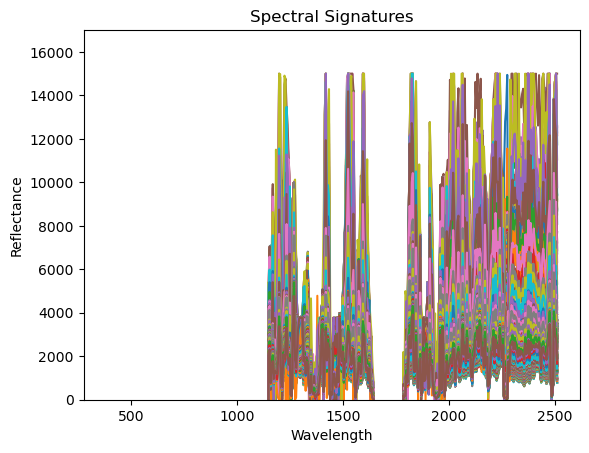

In [140]:
rowrange = np.arange(1, 6000, 6).tolist()
colrange = np.arange(0, 1000, 1).tolist()

original = envi.get_pixels(rowrange, colrange)
original

for i in range(original.shape[0]): # Loop through each row/pixel
    plt.plot(envi.wavelengths, original[i, :426], label=f'Pixel {i+1}')

plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures')
plt.ylim(0,17000)
plt.show()

In [6]:
import hytools as ht
import numpy as np

def get_spectral_data_and_wavelengths(filename, row_step, col_step):
    """
    Retrieve spectral data and wavelengths from a specified file using HyTools library.

    Parameters:
    - filename: str, the path to the file to be read.
    - row_step: int, the step size to sample rows by.
    - col_step: int, the step size to sample columns by.

    Returns:
    - original: np.ndarray, a 2D array where each row corresponds to the spectral data from one pixel.
    - wavelengths: np.ndarray, an array containing the wavelengths corresponding to each spectral band.
    """
    # Initialize the HyTools object
    envi = ht.HyTools()
    
    # Read the file using the specified format
    envi.read_file(filename, 'envi')
    
    # Define the row and column ranges
    rowrange = np.arange(0, round(envi.lines, -3), row_step).tolist()  # Adjusted to use envi.lines for dynamic range
    colrange = np.arange(0, round(envi.columns, -3), col_step).tolist()  # Adjusted to use envi.columns for dynamic range
    
    # Retrieve the pixels' spectral data
    original = envi.get_pixels(rowrange, colrange)
    
    # Also retrieve the wavelengths
    wavelengths = envi.wavelengths
    
    return original, wavelengths

# Example usage
filename = "export/ENVI__corrected_0"
row_step = 6
col_step = 1
spectral_data, wavelengths = get_spectral_data_and_wavelengths(filename, row_step, col_step)

# Now you have both the spectral data and the corresponding wavelengths



In [7]:
filename5 = "export/resample_landsat5"
spectral_data_landsat5, wavelengths5 = get_spectral_data_and_wavelengths(filename5, row_step, col_step)
filename7 = "export/resample_landsat7"
spectral_data_landsat7, wavelengths7 = get_spectral_data_and_wavelengths(filename7, row_step, col_step)
filename8 = "export/resample_landsat8"
spectral_data_landsat8, wavelengths8 = get_spectral_data_and_wavelengths(filename8, row_step, col_step)
filename9 = "export/resample_landsat9.img"
spectral_data_landsat9, wavelengths9 = get_spectral_data_and_wavelengths(filename9, row_step, col_step)

In [17]:
filename_corrected = "export/ENVI__corrected_0"
spectral_data_corrected, full_wavelengths = get_spectral_data_and_wavelengths(filename_corrected, row_step, col_step)




array([-9999.        , -9999.        , -9999.        , -9999.        ,
       -9999.        , -9998.99935073])

In [197]:
spectral_data_landsat9

array([[-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073],
       [-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073],
       [-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073],
       ...,
       [-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073],
       [-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073],
       [-9999.        , -9999.        , -9999.        , -9999.        ,
        -9999.        , -9998.99935073]])

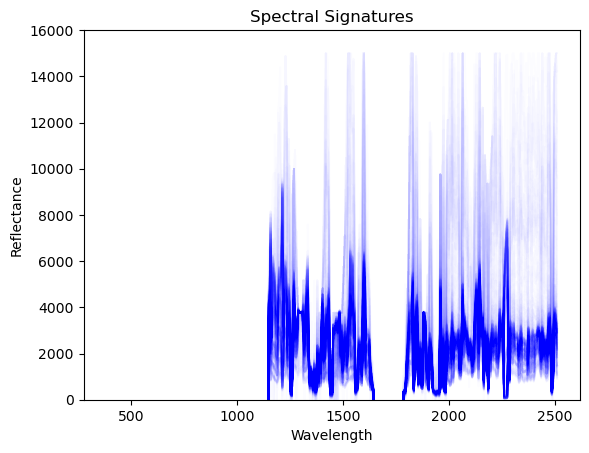

In [233]:
import matplotlib.pyplot as plt

def plot_spectral_signatures(wavelengths, spectral_data, line_color='blue', transparency=0.5):
    """
    Plot spectral signatures for each pixel in the spectral data, all in the same specified color and with transparency.

    Parameters:
    - wavelengths: array-like, the wavelengths corresponding to the spectral bands.
    - spectral_data: 2D array, spectral data where each row corresponds to a pixel and columns to spectral bands.
    - line_color: str, optional, the color of the lines. Default is 'blue'.
    - transparency: float, optional, the transparency level of the lines. Default is 0.5.
    """
    # Check if spectral_data is not empty
    if spectral_data.size == 0:
        print("Spectral data is empty.")
        return

    num_wavelengths = len(wavelengths)  # Dynamically get the number of wavelengths
    
    # Plotting each pixel's spectral signature
    for i in range(spectral_data.shape[0]):  # Loop through each row/pixel
        # Ensure plotting only up to the number of available wavelengths
        plt.plot(wavelengths, spectral_data[i, :num_wavelengths], color=line_color, alpha=transparency)
    
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title('Spectral Signatures')
    plt.ylim(0, 16000)
    plt.show()

# Example usage:
# Assuming envi.wavelengths and spectral_data are already defined:
plot_spectral_signatures(wavelengths_full, spectral_data_corrected, 'blue', 0.01)
plot_spectral_signatures(wavelengths_full, spectral_data_corrected, 'blue', 0.01)



ValueError: x and y must have same first dimension, but have shapes (426,) and (1000,)

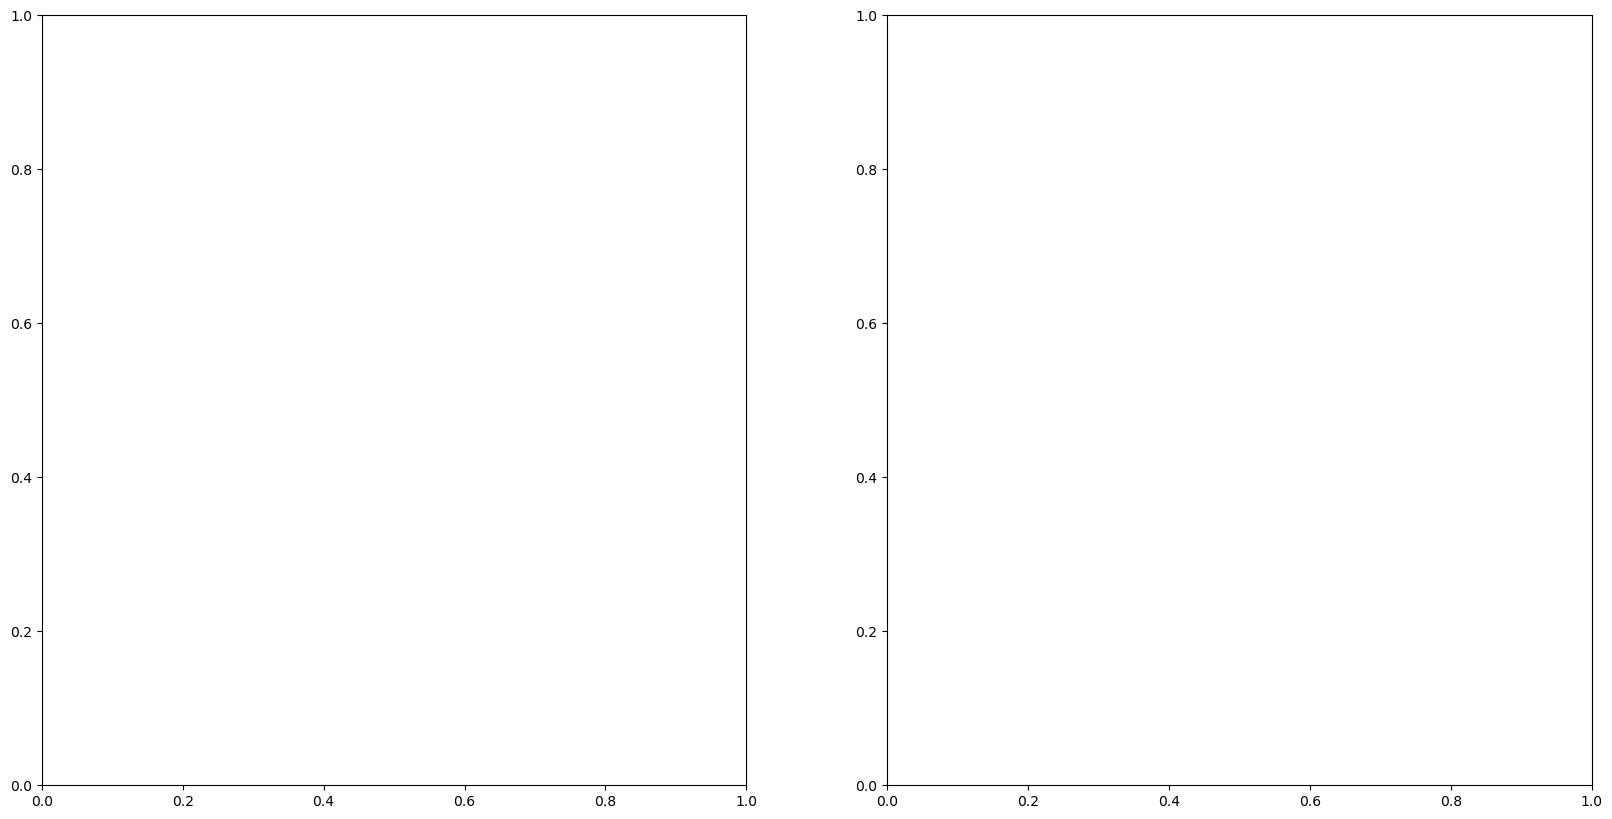

In [238]:
import matplotlib.pyplot as plt

def plot_spectral_signatures(ax, wavelengths, spectral_data, line_color='blue', transparency=0.5):
    if spectral_data.size == 0:
        print("Spectral data is empty.")
        return

    for i in range(spectral_data.shape[0]):
        ax.plot(wavelengths, spectral_data[i, :], color=line_color, alpha=transparency)
    
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Reflectance')
    ax.set_title('Spectral Signatures')
    ax.set_ylim(0, 16000)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Adjust these lines to use the axis from axs
plot_spectral_signatures(axs[0], wavelengths_full, spectral_data_corrected, 'blue', 0.01)
plot_spectral_signatures(axs[1], wavelengths_full, spectral_data_corrected, 'blue', 0.01)

plt.tight_layout()
plt.show()


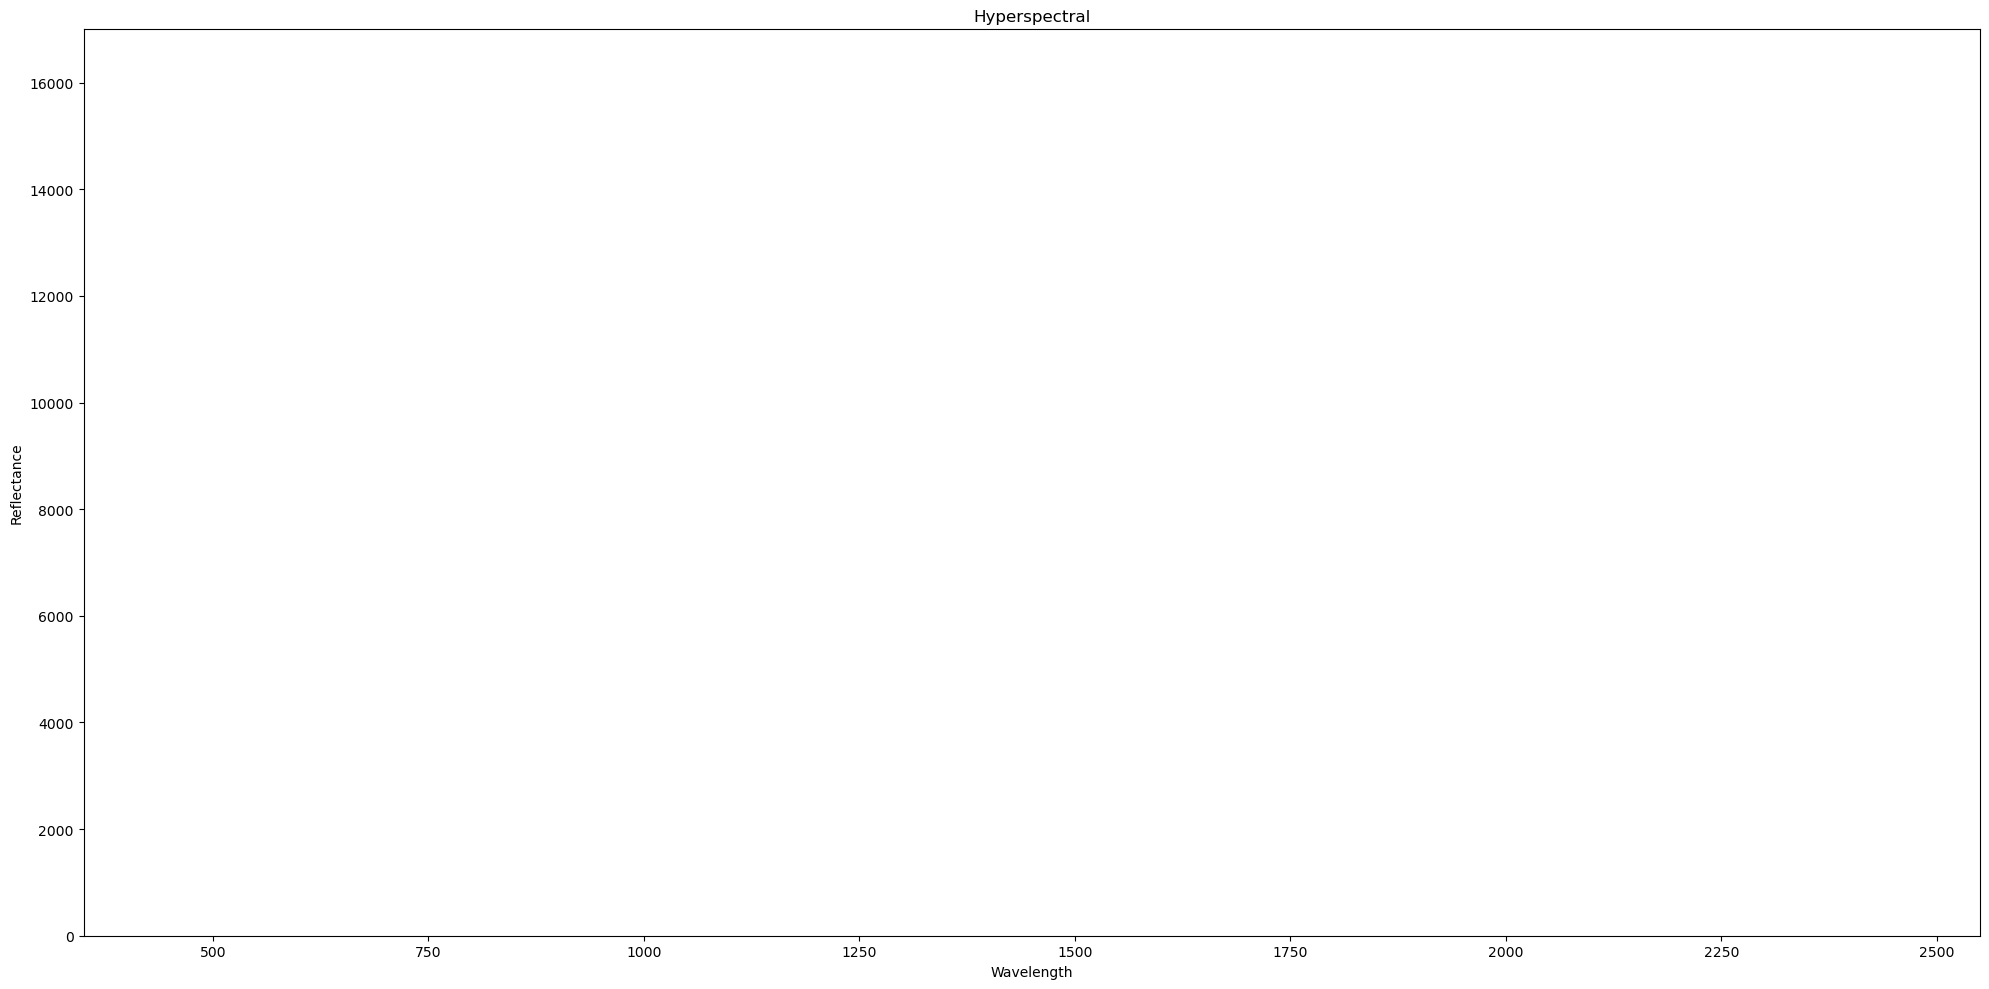

In [232]:
import matplotlib.pyplot as plt

def plot_spectral_signature_subplot(spectral_wavelengths, spectral_data_sets, subplot_titles, line_color='blue', transparency=0.01, nrows=2, ncols=2, save_path=None):
    """
    Adjusted to plot each dataset with its respective wavelengths.
    Handles varying dimensions by checking the size of the data against its wavelengths.
    """
    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))
    if nrows * ncols == 1:
        axs = [axs]  # Make it a list to keep it consistent
    else:
        axs = axs.ravel()

    for idx, data in enumerate(spectral_data_sets):
        wavelengths = spectral_wavelengths[idx]
        ax = axs[idx]
        
        # Handle 2D data arrays assuming each row is a separate spectrum
        if data.ndim == 2:
            # Plot each spectrum if wavelengths length matches the second dimension of data
            for spectrum in data:
                if len(wavelengths) == spectrum.shape[0]:
                    ax.plot(wavelengths, spectrum, color=line_color, alpha=transparency)
        elif data.ndim == 1 and len(wavelengths) == len(data):
            # Directly plot 1D data against wavelengths
            ax.plot(wavelengths, data, color=line_color, alpha=transparency)
        
        ax.set_title(subplot_titles[idx])
        ax.set_xlabel('Wavelength')
        ax.set_ylabel('Reflectance')
        ax.set_xlim([350, 2550])
        ax.set_ylim([0, 17000])
        
    for ax in axs[len(spectral_data_sets):]:
        ax.set_visible(False)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format=save_path.split('.')[-1], bbox_inches='tight')
    
    plt.show()


subplot_titles = ['Hyperspectral']
plot_spectral_signature_subplot([full_wavelengths], [spectral_data_corrected], subplot_titles, 'blue', 0.5, nrows=1, ncols=1,save_path='spectral_signatures.pdf')


#subplot_titles = ['Landsat 5', 'Landsat 7', 'Landsat 8', 'Landsat 9']
#plot_spectral_signature_subplot([ wavelengths9, wavelengths8, wavelengths7, wavelengths5], [spectral_data_landsat9, spectral_data_landsat8, spectral_data_landsat7, spectral_data_landsat5], subplot_titles, 'blue', 0.05, nrows=5, ncols=1,save_path='spectral_signatures.pdf')


#subplot_titles = ['Hyperspectral','Landsat 5', 'Landsat 7', 'Landsat 8', 'Landsat 9']
#plot_spectral_signature_subplot([full_wavelengths, wavelengths9, wavelengths8, wavelengths7, wavelengths5], [spectral_data_corrected, spectral_data_landsat9, spectral_data_landsat8, spectral_data_landsat7, spectral_data_landsat5], subplot_titles, 'blue', 0.05, nrows=5, ncols=1,save_path='spectral_signatures.pdf')



In [77]:
import pandas as pd
pd.DataFrame(spectral_data_corrected).transpose() 

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
996,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
997,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
998,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [181]:
import pandas as pd
import numpy as np

# Assuming `before_df` is your initial DataFrame and you need to perform similar operations:
#sampled_df = before_df.sample(n=50000)
long_df = pd.melt(pd.DataFrame(spectral_data_corrected).transpose() , var_name="band", value_name="reflectance")
#long_df['band'] = pd.to_numeric(long_df['wavelength_nm'])
long_df

,band,reflectance
0,0,-9999.0
1,0,-9999.0
2,0,-9999.0
3,0,-9999.0
4,0,-9999.0
...,...,...
425995,425,-9999.0
425996,425,-9999.0
425997,425,-9999.0
425998,425,-9999.0


In [182]:
waves=pd.DataFrame(full_wavelengths)
waves['band'] = range(len(waves))
waves.columns.values[0] = "wavelength_nm"
waves


,wavelength_nm,band
0,381.273010,0
1,386.281097,1
2,391.289215,2
3,396.297302,3
4,401.305511,4
...,...,...
421,2489.695557,421
422,2494.703613,422
423,2499.711914,423
424,2504.719971,424


In [183]:
full_dataset

,wavelength_nm,reflectance,band
0,381.273010,NaN,0
1,386.281097,NaN,1
2,391.289215,NaN,2
3,396.297302,NaN,3
4,401.305511,NaN,4
...,...,...,...
421,2489.695557,NaN,421
422,2494.703613,NaN,422
423,2499.711914,NaN,423
424,2504.719971,NaN,424


In [175]:
full_dataset =long_df.merge(waves, how='right', on='wavelength_nm')
full_dataset["wavelength_nm"] = pd.to_numeric(full_dataset["wavelength_nm"])

#full_dataset = full_dataset.drop('band', axis=1)
full_dataset

,wavelength_nm,reflectance,band
0,381.273010,NaN,0
1,386.281097,NaN,1
2,391.289215,NaN,2
3,396.297302,NaN,3
4,401.305511,NaN,4
...,...,...,...
421,2489.695557,NaN,421
422,2494.703613,NaN,422
423,2499.711914,NaN,423
424,2504.719971,NaN,424


In [185]:

merged_data = pd.merge(long_df, waves, on='band')


In [186]:
merged_data

,band,reflectance,wavelength_nm
0,0,-9999.0,381.273010
1,0,-9999.0,381.273010
2,0,-9999.0,381.273010
3,0,-9999.0,381.273010
4,0,-9999.0,381.273010
...,...,...,...
425995,425,-9999.0,2509.728027
425996,425,-9999.0,2509.728027
425997,425,-9999.0,2509.728027
425998,425,-9999.0,2509.728027


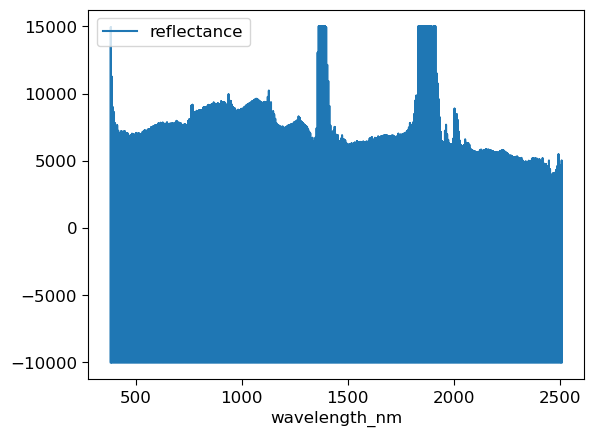

In [187]:
import matplotlib.pyplot as plt
ax =merged_data.plot( x = 'wavelength_nm', y = 'reflectance',  use_index=True)

plt.show()